In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
figure_folder = "images/feature_analysis/"
dirname = os.getcwd()
dataset_path = os.path.join(dirname, 'data/Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx')

In [4]:
target_column = "CLASS"

In [5]:
df = pd.read_excel(dataset_path, sheet_name="Rice_MSC_Dataset")

# Basic analysis

In [6]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 106 numerical features: 

['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'meanRR', 'meanRG', 'meanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'skewRR', 'skewRG', 'skewRB', 'kurtosisRR', 'kurtosisRG', 'kurtosisRB', 'entropyRR', 'entropyRG', 'entropyRB', 'meanH', 'meanS', 'meanV', 'StdDevH', 'StdDevS', 'StdDevV', 'skewH', 'skewS', 'skewV', 'kurtosisH', 'kurtosisS', 'kurtosisV', 'entropyH', 'entropyS', 'entropyV', 'meanL', 'meanA', 'meanB', 'StdDevL', 'StdDevA', 'StdDevB', 'skewL', 'skewA', 'skewB', 'kurtosisL', 'kurtosisA', 'kurtosisB', 'entropyL', 'entropyA', 'entropyB', 'meanY', 'meanCb', 'meanCr', 'StdDevY', 'StdDevCb', 'StdDevCr', 'skewY', 'skewCb', 'skewCr', 'kurtosisY', 'kurtosisCb', 'kurtosisCr', 'entropyY', 'entropyCb', 'entropyCr', 'meanXX', 'meanYY', 'meanZZ', 'StdDevXX', 'StdDevYY', 'StdDevZZ',

In [6]:
df.head(15)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio
5,11648,445.527,178.4659,84.9327,0.8795,121.7813,0.9599,12135,0.5660,2.1013,...,119.7029,63.6182,64.8977,109.8611,63.1965,63.9123,0.4033,0.4271,0.4513,Ipsala
6,7621,450.325,219.0981,45.2301,0.9785,98.5056,0.9718,7842,0.3398,4.8441,...,113.1946,62.9067,60.0384,103.5944,67.7779,60.8812,0.3506,0.3725,0.4597,Basmati
7,8582,367.338,146.6128,75.5406,0.8570,104.5320,0.9740,8811,0.6423,1.9408,...,113.1557,64.2058,63.0356,103.8655,64.8609,63.7912,0.3589,0.3759,0.4224,Arborio
8,5450,320.362,139.9963,50.6910,0.9321,83.3016,0.9626,5662,0.5502,2.7618,...,104.7480,64.9443,60.6481,96.0847,66.8883,63.4677,0.2957,0.3054,0.3727,Jasmine
9,6781,307.023,116.2443,74.8093,0.7654,92.9184,0.9819,6906,0.7208,1.5539,...,103.2817,66.1287,57.6591,94.9933,69.4724,63.2545,0.2931,0.2967,0.4024,Karacadag


In [7]:
shape = df.shape
rows_number, columns_number = shape
print(shape)

(75000, 107)


In [8]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,8379.197507,378.169453,161.805540,66.829335,0.886077,101.731251,0.975896,8584.862320,0.633226,2.597063,...,0.448960,111.088252,64.379443,61.461457,101.925425,66.240541,63.202088,0.341944,0.357058,0.421176
std,3119.209274,70.597008,36.461005,16.689269,0.071906,17.874070,0.007966,3189.298025,0.123795,0.968982,...,0.021736,5.904854,1.175616,2.435635,5.436861,2.159109,1.174976,0.041921,0.047139,0.043137
min,3929.000000,261.040000,96.968300,34.673000,0.627700,70.728800,0.877500,4032.000000,0.278800,1.284500,...,0.313900,82.300600,59.137900,53.653800,75.191800,58.323800,57.363400,0.159700,0.169000,0.191800
25%,6259.000000,316.431500,132.623500,49.650200,0.846100,89.270400,0.970900,6385.000000,0.561000,1.876100,...,0.434200,106.632900,63.883800,59.465575,97.834400,64.842000,63.052800,0.309900,0.320900,0.391200
50%,7345.000000,351.261000,149.343950,69.183900,0.885600,96.705500,0.976400,7532.000000,0.655800,2.153200,...,0.451600,110.770700,64.419350,61.424400,101.683700,66.291600,63.522050,0.340100,0.353300,0.424200
75%,8901.000000,444.986000,197.462025,75.814125,0.950800,106.457100,0.982200,9153.000000,0.727800,3.228700,...,0.466100,115.065075,65.174200,63.076825,105.592450,68.011800,63.734000,0.370300,0.387900,0.454700
max,21019.000000,593.698000,255.647200,113.441100,0.986800,163.591600,0.992100,21633.000000,0.901700,6.179500,...,0.495100,126.265100,67.459000,70.284000,116.287300,73.424700,66.539100,0.463900,0.488600,0.530200


## Missing values

In [8]:
df = df.replace('?',np.nan)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 107 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    AREA           75000 non-null  int64  
 1    PERIMETER      75000 non-null  float64
 2    MAJOR_AXIS     75000 non-null  float64
 3    MINOR_AXIS     75000 non-null  float64
 4    ECCENTRICITY   75000 non-null  float64
 5    EQDIASQ        75000 non-null  float64
 6    SOLIDITY       75000 non-null  float64
 7    CONVEX_AREA    75000 non-null  int64  
 8    EXTENT         75000 non-null  float64
 9    ASPECT_RATIO   75000 non-null  float64
 10   ROUNDNESS      75000 non-null  float64
 11   COMPACTNESS    75000 non-null  float64
 12   SHAPEFACTOR_1  75000 non-null  float64
 13   SHAPEFACTOR_2  75000 non-null  float64
 14   SHAPEFACTOR_3  75000 non-null  float64
 15   SHAPEFACTOR_4  75000 non-null  float64
 16   meanRR         75000 non-null  float64
 17   meanRG         75000 non-null

We have a very small amount of missing values so we will drop the rows containing them.

In [9]:
df = df.dropna()

## Duplicate rows

In [10]:
duplicate_count = len(df[df.duplicated() == True])
print(f"There are {duplicate_count} duplicated rows.")

There are 296 duplicated rows.


The number of duplicated rows is relatively low, so we will drop them.

In [11]:
df = df.drop_duplicates()

## Visualize features

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms

In [10]:
for col in numerical_features:
    fg = plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.savefig(f"{figure_folder}/histograms/hist-{col}.png")
    plt.close(fg)
    plt.cla()
    plt.clf()

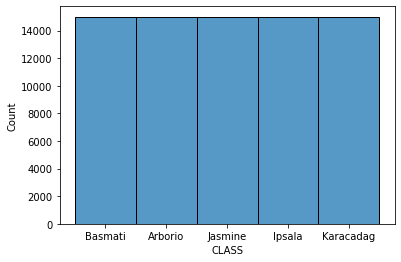

<Figure size 432x288 with 0 Axes>

In [45]:
#Target col info
fg = plt.figure()
sns.histplot(data=df, x=target_column)
plt.savefig(f"{figure_folder}/histograms/hist-{target_column}.png")
plt.show()
plt.close(fg)
plt.cla()
plt.clf()

### Correlation heatmap

In [42]:
fg = plt.figure(figsize=(50,50))
sns.heatmap(data=df.corr())
plt.savefig(f"{figure_folder}corr-heatmap.png", bbox_inches = 'tight', dpi=400)
plt.close(fg)
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

### Violin plots

In [19]:
for col in numerical_features:
    fg = plt.figure()
    sns.violinplot(data=df, x=target_column, y=col)
    plt.savefig(f"{figure_folder}/violins/viol-{col}.png")
    plt.close(fg)
    plt.cla()
    plt.clf()

## Detect outliers

In [13]:
import OutlierDetection as out_det

In [14]:
outlierCounts = {}
for col in numerical_features:
    outliersIQR = out_det.indicies_of_outliers(df[col])
    outliersZScore = out_det.outliers_z_score(df[col])
    outliersModZScore = out_det.outliers_modified_z_score(df[col])
    outlierCounts[col] = { "IQR": outliersIQR, "ZScore": outliersZScore, "ModZScore": outliersModZScore }

### Visualize the outliers

In [15]:
outlier_df = pd.DataFrame.from_dict(outlierCounts, orient = "index")
outlier_count_df = outlier_df.applymap(lambda x: len(x))

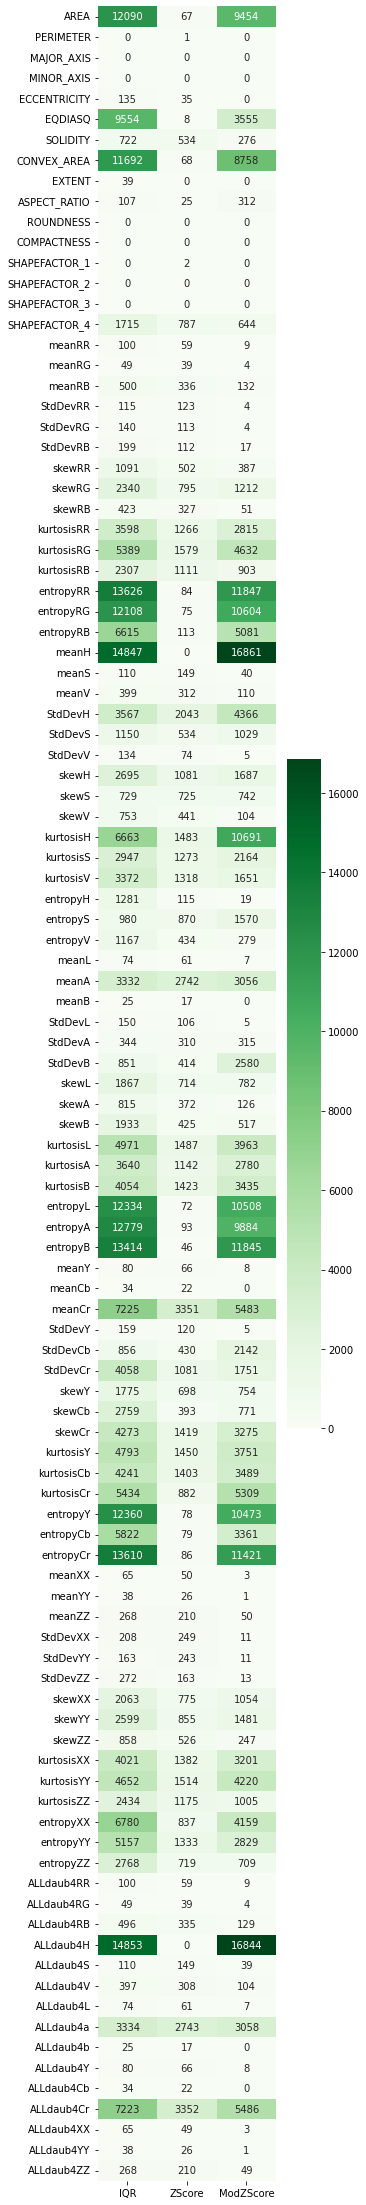

<Figure size 432x288 with 0 Axes>

In [60]:
fg = plt.figure(figsize=(4,40))
sns.heatmap(data=outlier_count_df, annot=True, fmt="d", cmap="Greens")
plt.savefig(f"{figure_folder}outlier-heatmap.png", bbox_inches = 'tight', dpi=400)
plt.show()
plt.close(fg)
plt.cla()
plt.clf()

# Preprocessing

## Encoding the target variable

In [16]:
target_column_dict = { "Basmati": 0, "Arborio": 1, "Jasmine": 2, "Ipsala": 3, "Karacadag": 4 }
reverse_target_column_dict = { 0: "Basmati", 1: "Arborio", 2: "Jasmine", 3: "Ipsala", 4: "Karacadag" }
df[target_column] = df[target_column].replace(target_column_dict)

## Scaling

Considering the high number of outliers across features (up to 20%), and the indication that they are important for predicting the target variable, we won't remove them, but try to balance them out through scaling.

### Define scaling functions

In [17]:
import sklearn.preprocessing as preproc

In [18]:
#Define scaling functions
def minmax_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    scaler = preproc.MinMaxScaler(feature_range=(0, 1))
    df[columns_toscale] = scaler.fit_transform(df[columns_toscale])
    return df               
         
def standard_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    std_scaler = preproc.StandardScaler()
    df[columns_toscale] = std_scaler.fit_transform(df[columns_toscale])
    return df
    
def robust_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    rbst_scaler = preproc.RobustScaler()
    df[columns_toscale] = rbst_scaler.fit_transform(df[columns_toscale])
    return df

def quantile_scale(dataframe: pd.DataFrame, columns_toscale: list, distribution: str):
    df = dataframe.copy()
    quantile_transformer = preproc.QuantileTransformer(random_state=0, output_distribution=distribution)
    df[columns_toscale] = quantile_transformer.fit_transform(df[columns_toscale])
    return df

def power_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    power_transformer = preproc.PowerTransformer()
    df[columns_toscale] = power_transformer.fit_transform(df[columns_toscale])
    return df

In [19]:
dfs_touse = {}

In [20]:
dfs_touse["MinMax"] = minmax_scale(df, numerical_features) 
dfs_touse["Standard"] = standard_scale(df, numerical_features)
dfs_touse["Robust"] = robust_scale(df, numerical_features) 
dfs_touse["Quantile (Uniform)"] = quantile_scale(df, numerical_features, "uniform") 
dfs_touse["Quantile (Normal)"] = quantile_scale(df, numerical_features, "normal") 
dfs_touse["Power"] = power_scale(df, numerical_features)

C:\Users\djord\source\repos\ML\ML.FirstProject\venv\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Testing

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
import time
from keras.utils import np_utils

#### Define reference test

In [22]:
scoring_metrics = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='weighted')
    }

def reference_test(model, data, label, printRes = False):
    starttime = time.perf_counter()
    cv_results = cross_validate(decisionTree, data.drop(columns=[target_column]), data[target_column], scoring=scoring_metrics,
         cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), n_jobs=-1, return_estimator=True, error_score='raise')
    endtime = time.perf_counter()
    
    AccuScores = cv_results['test_accuracy']
    PrecScores = cv_results['test_precision']
    RecScores = cv_results['test_recall']
    F1Scores = cv_results['test_f1_score']

    AccuScores = np.absolute(AccuScores)
    PrecScores = np.absolute(PrecScores)
    RecScores = np.absolute(RecScores)
    F1Scores = np.absolute(F1Scores)

    print(f"{label} - time to cross validate: {endtime - starttime:0.4f}s")
    
    # summarize the model performance
    if (printRes == True):
        print(f'{label} - scoring results:')
        print('Accuracy: {:.3%}'.format(np.mean(AccuScores)))
        print('Precision: {:.3%}'.format(np.mean(PrecScores)))
        print('Recall: {:.3%}'.format(np.mean(RecScores)))
        print('F1 Score: {:.3%}'.format(np.mean(F1Scores)))
        
    return {
        'Accuracy': np.mean(AccuScores),
        'Precision': np.mean(PrecScores),
        'Recall': np.mean(RecScores),
        'F1': np.mean(F1Scores)
    }

#### Define basic network test

In [42]:
def test_network(network, X_train, X_test, X_val, Y_val, Y_train, Y_test, class_map, label, batch_size, epochs, callbacks=None):
    Y_train_enc = np_utils.to_categorical(Y_train, num_classes=5)
    Y_test_enc = np_utils.to_categorical(Y_test, num_classes=5)
    Y_val_enc = np_utils.to_categorical(Y_val, num_classes=5)
    
    starttime = time.perf_counter()
    history = network.fit(X_train, Y_train_enc,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=callbacks,
          validation_data = (X_val, Y_val_enc),
          verbose=0)
    traintime = time.perf_counter() - starttime

    starttime = time.perf_counter()
    Y_pred = np.argmax(network.predict(X_test), axis=-1)
    result = classification_report(Y_test, Y_pred, output_dict=True)
    scores = network.evaluate(X_test, Y_test_enc, verbose=0)
    testtime = time.perf_counter() - starttime
    
    print(f"{label}:")
    print(f"\tTime to train: {traintime:0.4f}s")
    print(f"\tTime to test: {testtime:0.4f}s")

    return {
        'Accuracy': scores[1],
        f'Precision_{class_map[0]}': result['0']['precision'],
        f'Precision_{class_map[1]}': result['1']['precision'],
        f'Precision_{class_map[2]}': result['2']['precision'],
        f'Precision_{class_map[3]}': result['3']['precision'],
        f'Precision_{class_map[4]}': result['4']['precision'],
        'Precision_avg': result['weighted avg']['precision'],
        f'Recall_{class_map[0]}': result['0']['recall'],
        f'Recall_{class_map[1]}': result['1']['recall'],
        f'Recall_{class_map[2]}': result['2']['recall'],
        f'Recall_{class_map[3]}': result['3']['recall'],
        f'Recall_{class_map[4]}': result['4']['recall'],
        'Recall_avg': result['weighted avg']['recall'],
        f'F1_{class_map[0]}': result['0']['f1-score'],
        f'F1_{class_map[1]}': result['1']['f1-score'],
        f'F1_{class_map[2]}': result['2']['f1-score'],
        f'F1_{class_map[3]}': result['3']['f1-score'],
        f'F1_{class_map[4]}': result['4']['f1-score'],
        'F1_avg': result['weighted avg']['f1-score']
    }, history

#### Define extensive network test

In [23]:
def cv_test_network(build_network, data, class_map, label, batch_size, epochs, callbacks=None):
    X, Y = data.drop(columns=[target_column]), data[target_column]
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    accuracy = 0
    precision_0 = 0
    precision_1 = 0
    precision_2 = 0
    precision_3 = 0
    precision_4 = 0
    precision_avg = 0
    recall_0 = 0
    recall_1 = 0
    recall_2 = 0
    recall_3 = 0
    recall_4 = 0
    recall_avg = 0
    f1_0 = 0
    f1_1 = 0
    f1_2 = 0
    f1_3 = 0
    f1_4 = 0
    f1_avg = 0
    
    fold_no = 0
    for train_indices, test_indices in cv.split(X, Y):
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
        
        Y_train_enc = np_utils.to_categorical(Y_train, num_classes=5)
        Y_test_enc = np_utils.to_categorical(Y_test, num_classes=5)
        
        network = build_network()
        
        starttime = time.perf_counter()
        network.fit(X_train, Y_train_enc,
              batch_size=batch_size,
              epochs=epochs,
              callbacks=callbacks,
              verbose=0)
        endttime = time.perf_counter()
        
        print(f"{label} (fold number {fold_no}) - time to train: {endttime - starttime:0.4f}s")
        
        Y_pred = np.argmax(network.predict(X_test), axis=-1)
        
        result = classification_report(Y_test, Y_pred, output_dict=True)
        scores = network.evaluate(X_test, Y_test_enc, verbose=0)
        
        accuracy += scores[1]
        precision_0 += result['0']['precision']
        precision_1 += result['1']['precision']
        precision_2 += result['2']['precision']
        precision_3 += result['3']['precision']
        precision_4 += result['4']['precision']
        precision_avg += result['weighted avg']['precision']
        recall_0 += result['0']['recall']
        recall_1 += result['1']['recall']
        recall_2 += result['2']['recall']
        recall_3 += result['3']['recall']
        recall_4 += result['4']['recall']
        recall_avg += result['weighted avg']['recall']
        f1_0 += result['0']['f1-score']
        f1_1 += result['1']['f1-score']
        f1_2 += result['2']['f1-score']
        f1_3 += result['3']['f1-score']
        f1_4 += result['4']['f1-score']
        f1_avg += result['weighted avg']['f1-score']
        
        fold_no += 1
        
    accuracy /= fold_no
    precision_0 /= fold_no
    precision_1 /= fold_no
    precision_2 /= fold_no
    precision_3 /= fold_no
    precision_4 /= fold_no
    precision_avg /= fold_no
    recall_0 /= fold_no
    recall_1 /= fold_no
    recall_2 /= fold_no
    recall_3 /= fold_no
    recall_4 /= fold_no
    recall_avg /= fold_no
    f1_0 /= fold_no
    f1_1 /= fold_no
    f1_2 /= fold_no
    f1_3 /= fold_no
    f1_4 /= fold_no
    f1_avg /= fold_no
    
    return {
        'Accuracy': accuracy,
        f'Precision_{class_map[0]}': precision_0,
        f'Precision_{class_map[1]}': precision_1,
        f'Precision_{class_map[2]}': precision_2,
        f'Precision_{class_map[3]}': precision_3,
        f'Precision_{class_map[4]}': precision_4,
        'Precision_avg': precision_avg,
        f'Recall_{class_map[0]}': recall_0,
        f'Recall_{class_map[1]}': recall_1,
        f'Recall_{class_map[2]}': recall_2,
        f'Recall_{class_map[3]}': recall_3,
        f'Recall_{class_map[4]}': recall_4,
        'Recall_avg': recall_avg,
        f'F1_{class_map[0]}': f1_0,
        f'F1_{class_map[1]}': f1_1,
        f'F1_{class_map[2]}': f1_2,
        f'F1_{class_map[3]}': f1_3,
        f'F1_{class_map[4]}': f1_4,
        'F1_avg': f1_avg
    }


## Different scaling methods

We will define a simple neural network to test different scaling methods, before proceeding with more detailed testing.

### Define basic neural network

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
def build_basic_network():
    #Build neural network
    network = Sequential()
    network.add(Dense(80, input_dim=106, activation='relu'))
    network.add(Dense(80, activation='relu'))
    network.add(Dense(5, activation='softmax'))

    # Compile neural network
    network.compile(loss="categorical_crossentropy", # Cross-entropy
                    optimizer="adam", # Adam optization
                    metrics=["accuracy"]) # Accuracy performance metric
    return network

### Perform reference tests

In [26]:
from sklearn.tree import DecisionTreeClassifier

reference_results = {}
decision_tree = DecisionTreeClassifier()

In [27]:
#Helper method
def perform_ref_test(model, label):
    global reference_results
    reference_results[label] = reference_test(model, dfs_touse[label], label)

In [98]:
print('Performing reference tests with a DecisionTree classifier...')
perform_ref_test(decision_tree, 'MinMax')
perform_ref_test(decision_tree, 'Standard')
perform_ref_test(decision_tree, 'Robust')
perform_ref_test(decision_tree, 'Quantile (Uniform)')
perform_ref_test(decision_tree, 'Quantile (Normal)')
perform_ref_test(decision_tree, 'Power')

Performing reference tests with a DecisionTree classifier...
MinMax - time to cross validate: 33.2591s
Standard - time to cross validate: 35.0785s
Robust - time to cross validate: 35.3452s
Quantile (Uniform) - time to cross validate: 36.1329s
Quantile (Normal) - time to cross validate: 35.6641s
Power - time to cross validate: 34.5974s


In [99]:
#Compile results
reference_df = pd.DataFrame.from_dict(reference_results, orient='index')

Text(32.99999999999999, 0.5, 'Scaling methods')

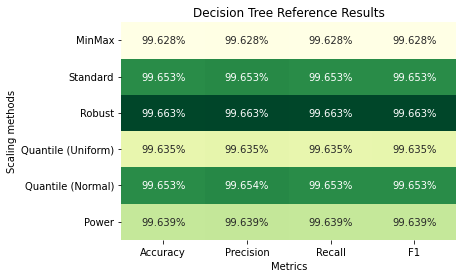

In [109]:
sns.heatmap(reference_df, annot=reference_df, cmap="YlGn", cbar=False, fmt=".3%")
plt.title("Decision Tree Reference Results")
plt.xlabel("Metrics")
plt.ylabel("Scaling methods")

### Perform network tests

In [28]:
from sklearn.model_selection import train_test_split

network_results = {}

In [29]:
def perform_net_test(build_network, label, batch_size, epochs, callbacks = None):
    data = dfs_touse[label]
    X, Y = data.drop(columns=[target_column]), data[target_column]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1, stratify=Y_train )
    
    res, history = test_network(build_network(), X_train, X_test, X_val, Y_val, Y_train, Y_test, 
                                          reverse_target_column_dict, label, batch_size, epochs, callbacks = callbacks)
    global network_results
    network_results[label] = res
    
    return history

In [114]:
print("Performing basic network testing over different scaling methods...")
perform_net_test(build_basic_network, 'MinMax', 100, 3)
perform_net_test(build_basic_network, 'Standard', 100, 3)
perform_net_test(build_basic_network, 'Robust', 100, 3)
perform_net_test(build_basic_network, 'Quantile (Uniform)', 100, 3)
perform_net_test(build_basic_network, 'Quantile (Normal)', 100, 3)
perform_net_test(build_basic_network, 'Power', 100, 3)

Performing basic network testing over different scaling methods...
MinMax:
	Time to train: 59.2992s
	Time to test: 57.3739s
Standard:
	Time to train: 63.9031s
	Time to test: 56.3713s
Robust:
	Time to train: 62.5889s
	Time to test: 52.6496s
Quantile (Uniform):
	Time to train: 64.3658s
	Time to test: 53.7505s
Quantile (Normal):
	Time to train: 66.7423s
	Time to test: 54.9375s
Power:
	Time to train: 72.0990s
	Time to test: 61.0914s


In [30]:
#Compile results
scaling_df = pd.DataFrame.from_dict(network_results, orient='index')

Text(159.0, 0.5, 'Scaling methods')

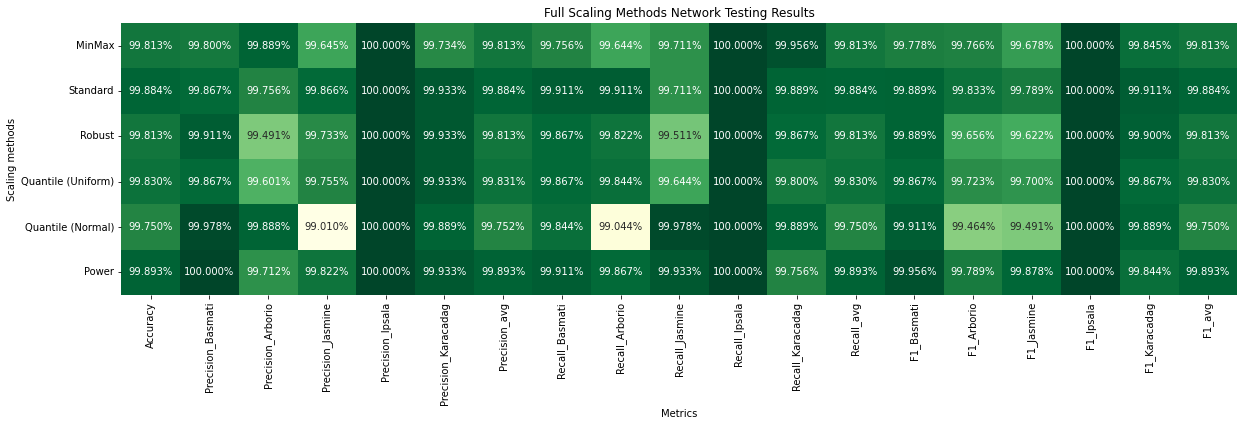

In [129]:
#Check out the full data
plt.figure(figsize=(20,5))
sns.heatmap(scaling_df, annot=scaling_df, cmap="YlGn", cbar=False, fmt=".3%")
plt.title("Full Scaling Methods Network Testing Results")
plt.xlabel("Metrics")
plt.ylabel("Scaling methods")

<AxesSubplot:>

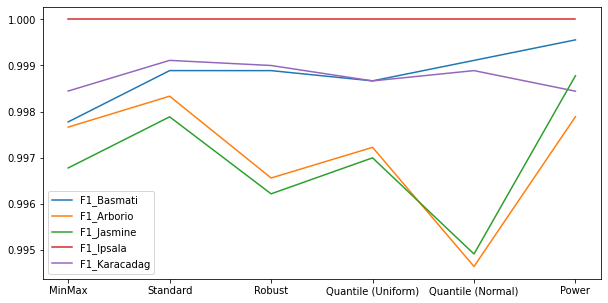

In [135]:
#Check out F1 scores per classes
f1_scaling_df = scaling_df[['F1_Basmati','F1_Arborio','F1_Jasmine','F1_Ipsala','F1_Karacadag']]
f1_scaling_df.plot(figsize=(10,5))

### Compare results

Text(602.2500000000001, 0.5, 'Scaling methods')

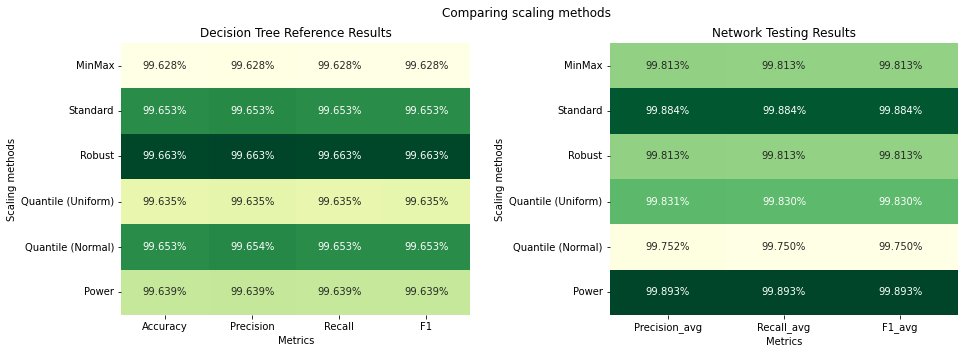

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Comparing scaling methods')

sns.heatmap(reference_df, annot=reference_df, cmap="YlGn", cbar=False, fmt=".3%", ax=axes[0])
axes[0].set_title("Decision Tree Reference Results")
axes[0].set_xlabel("Metrics")
axes[0].set_ylabel("Scaling methods")

compact_scaling_df = scaling_df[['Precision_avg', 'Recall_avg', 'F1_avg']]
sns.heatmap(compact_scaling_df, annot=compact_scaling_df, cmap="YlGn", cbar=False, fmt=".3%", ax=axes[1])
axes[1].set_title("Network Testing Results")
axes[1].set_xlabel("Metrics")
axes[1].set_ylabel("Scaling methods")

Even though the results are relatively similar, the dataset that was made using a power transform does edge out the one that was standardized, so we will use that dataset further on.

# Optimizing the network

In [31]:
network_results = {}

## Reducing overfitting

In [32]:
def plot_results (history, label):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(label)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [62]:
history = perform_net_test(build_basic_network, 'Power', 1000, 20)

Power:
	Time to train: 83.7949s
	Time to test: 77.7344s


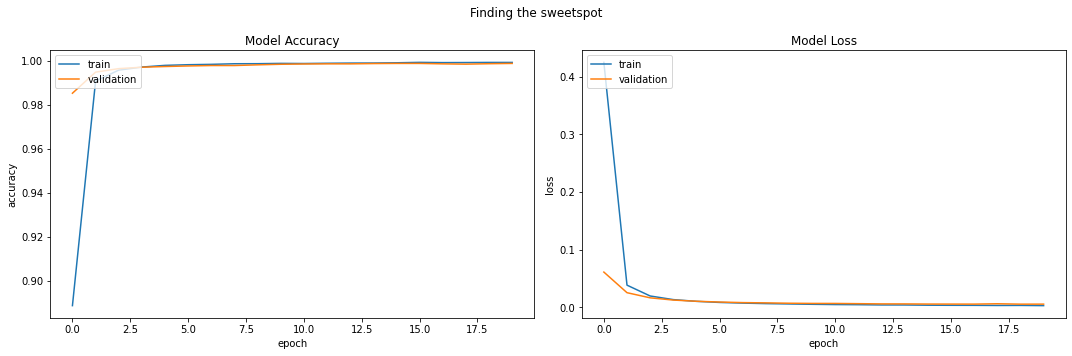

In [63]:
plot_results(history, "Finding the sweetspot")

Considering our specific situation, where the model's peformance is consistently very good, it's difficult to find the actual point where overfitting starts, but nonetheless, we will attempt multiple traditional methods for combating overfitting, and we will compare the results.

### Weight regularization

In [64]:
#Save previous results
network_results['Unmodified'] = network_results['Power']

In [33]:
from keras import regularizers

def build_weighted_network():
    #Build neural network
    network = Sequential()
    network.add(Dense(80, input_dim=106, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    network.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    network.add(Dense(5, activation='softmax'))

    # Compile neural network
    network.compile(loss="categorical_crossentropy", # Cross-entropy
                    optimizer="adam", # Adam optization
                    metrics=["accuracy"]) # Accuracy performance metric
    return network

In [72]:
history = perform_net_test(build_weighted_network, 'Power', 1000, 20)
network_results['Weighted'] = network_results['Power']
network_results['Power'] = None

Power:
	Time to train: 85.0736s
	Time to test: 67.9388s


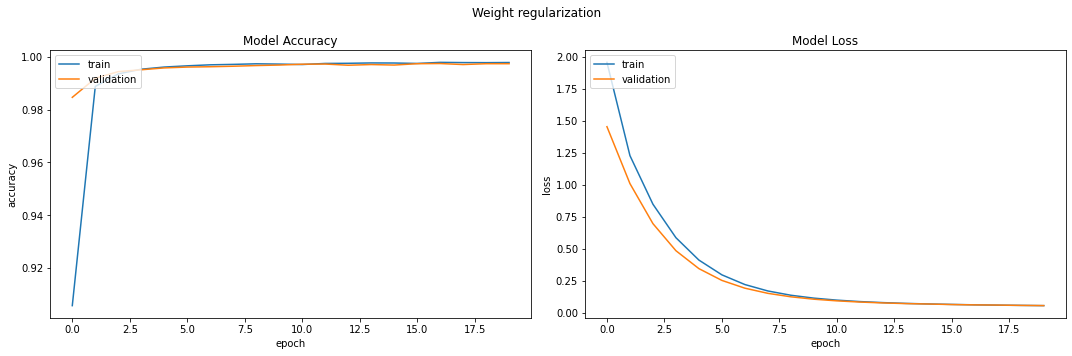

In [73]:
plot_results(history, "Weight regularization")

### Early stopping

In [40]:
#Prepare callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.models import load_model 

callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             CSVLogger('history.csv'),
             ModelCheckpoint(filepath="best_model.h5",
             monitor="val_loss",
             save_best_only=True)]

In [74]:
history = perform_net_test(build_basic_network, 'Power', 1000, 20, callbacks=callbacks)

Power:
	Time to train: 82.3518s
	Time to test: 72.1404s


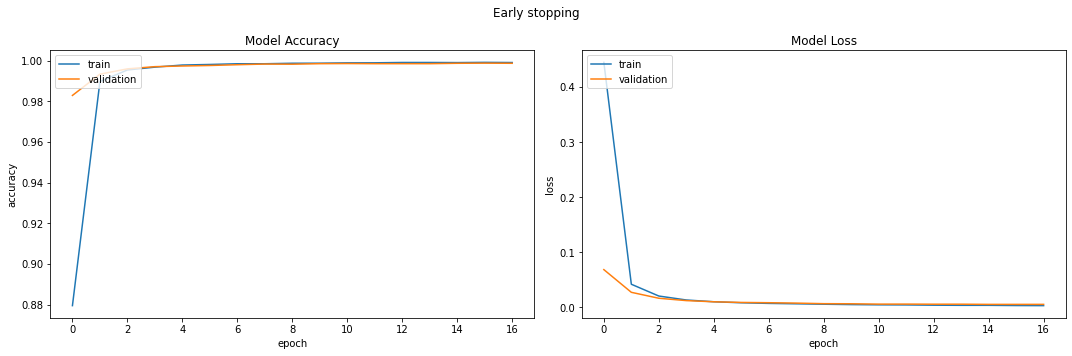

In [78]:
network_results['EarlyStopping'] = network_results['Power']
network_results['Power'] = None
plot_results(history, "Early stopping")

### Using dropout

In [81]:
from keras.layers import Dropout

def build_dropout_network():
    #Build neural network
    network = Sequential()
    network.add(Dropout(0.2, input_dim=106))
    network.add(Dense(80, activation='relu'))
    network.add(Dropout(0.5))
    network.add(Dense(80, activation='relu'))
    network.add(Dropout(0.5))
    network.add(Dense(5, activation='softmax'))

    # Compile neural network
    network.compile(loss="categorical_crossentropy", # Cross-entropy
                    optimizer="adam", # Adam optization
                    metrics=["accuracy"]) # Accuracy performance metric
    return network

In [82]:
history = perform_net_test(build_dropout_network, 'Power', 1000, 20)
network_results['Dropout'] = network_results['Power']
network_results['Power'] = None

Power:
	Time to train: 77.4246s
	Time to test: 60.3383s


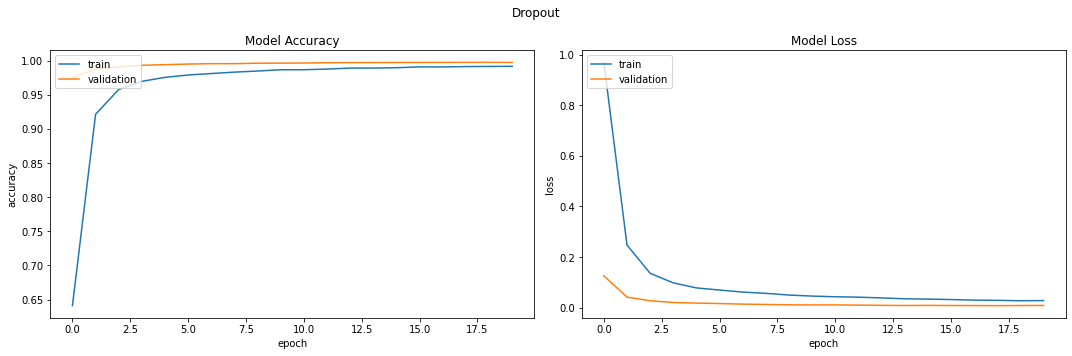

In [83]:
plot_results(history, "Dropout")

In [88]:
#Compile results
network_results.pop('Power', None)
overfitting_df = pd.DataFrame.from_dict(network_results, orient='index')

Text(159.0, 0.5, 'Methods')

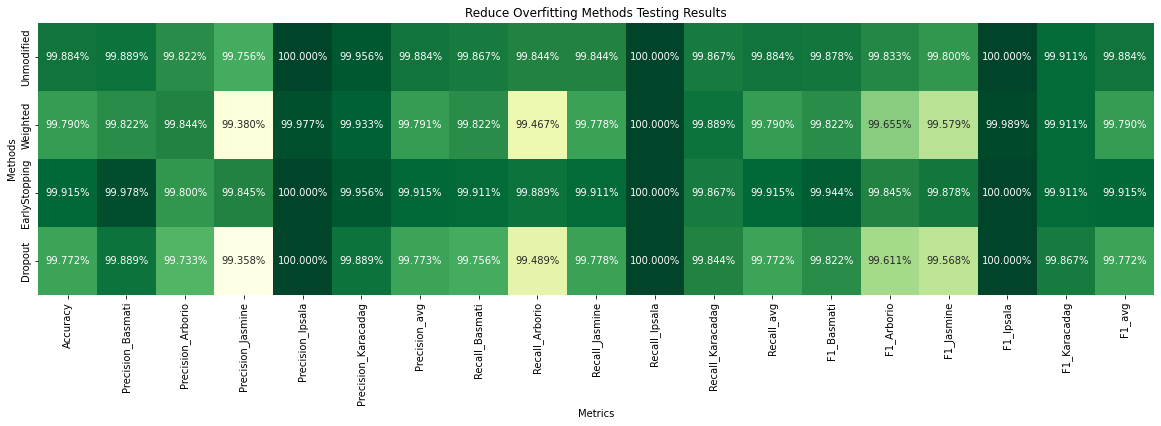

In [89]:
plt.figure(figsize=(20,5))
sns.heatmap(overfitting_df, annot=overfitting_df, cmap="YlGn", cbar=False, fmt=".3%")
plt.title("Reduce Overfitting Methods Testing Results")
plt.xlabel("Metrics")
plt.ylabel("Methods")

Seemingly, the early stopping technique gives us the best results so we will stick with it.

## Trying out different activation functions

In [44]:
from tensorflow.keras.layers import PReLU

activation_functions = [
    ('ReLU', 'relu'),
    ('Leaky ReLU', 'leaky_relu'),
    ('Parametric ReLU', PReLU()),
    ('ELU', 'elu'),
    ('GeLU', 'gelu'),
    ('Tanh', 'tanh'),
    ('Sigmoid', 'sigmoid'),
    ('Softmax', 'softmax'),
    ('Softplus', 'softplus'),
    ('Softsign', 'softsign')]

def build_activation_network(activation_function, output_activation='softmax'):
    #Build neural network
    network = Sequential()
    network.add(Dense(80, input_dim=106, activation=activation_function))
    network.add(Dense(80, activation=activation_function))
    network.add(Dense(5, activation=output_activation))

    # Compile neural network
    network.compile(loss="categorical_crossentropy", # Cross-entropy
                    optimizer="adam", # Adam optization
                    metrics=["accuracy"]) # Accuracy performance metric
    
    return network
    
def perform_param_test(network, data, label, batch_size, epochs, callbacks = None):
    X, Y = data.drop(columns=[target_column]), data[target_column]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1, stratify=Y_train )
    
    res, history = test_network(network, X_train, X_test, X_val, Y_val, Y_train, Y_test, 
                                          reverse_target_column_dict, label, batch_size, epochs, callbacks = callbacks)
    global network_results
    network_results[label] = res
    
    global history_results
    history_results[label] = history
    
    return history

ReLU:
	Time to train: 69.0739s
	Time to test: 56.9085s


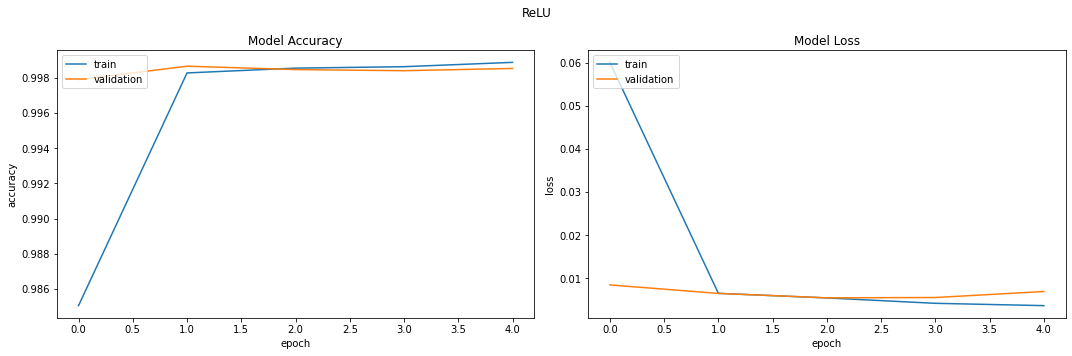

Leaky ReLU:
	Time to train: 73.8114s
	Time to test: 58.2823s


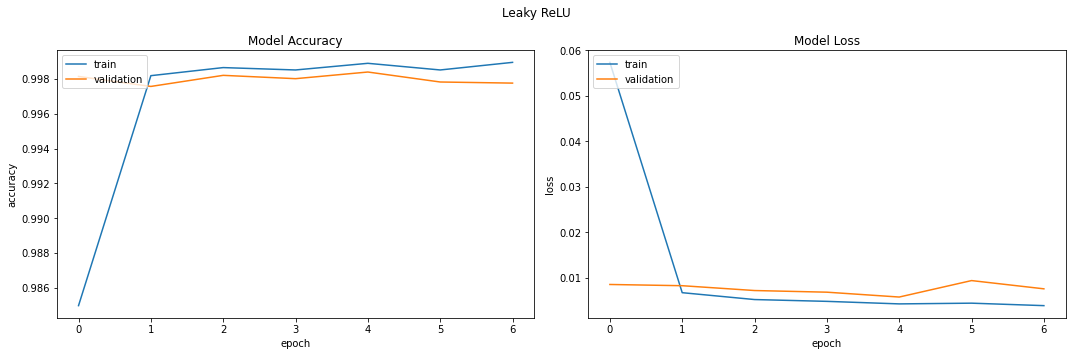

Parametric ReLU:
	Time to train: 70.7555s
	Time to test: 59.9217s


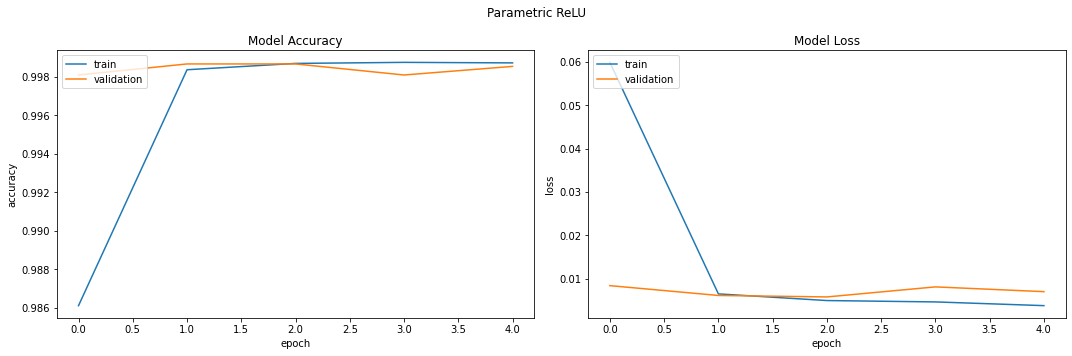

ELU:
	Time to train: 75.7012s
	Time to test: 58.3164s


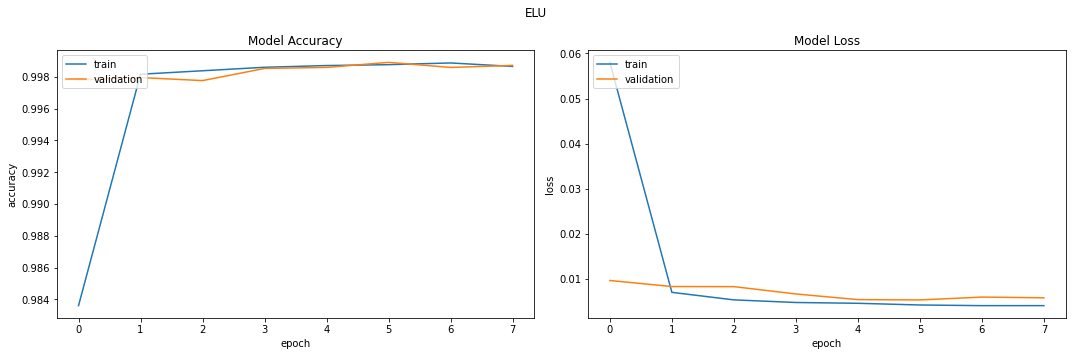

GeLU:
	Time to train: 77.3319s
	Time to test: 60.5425s


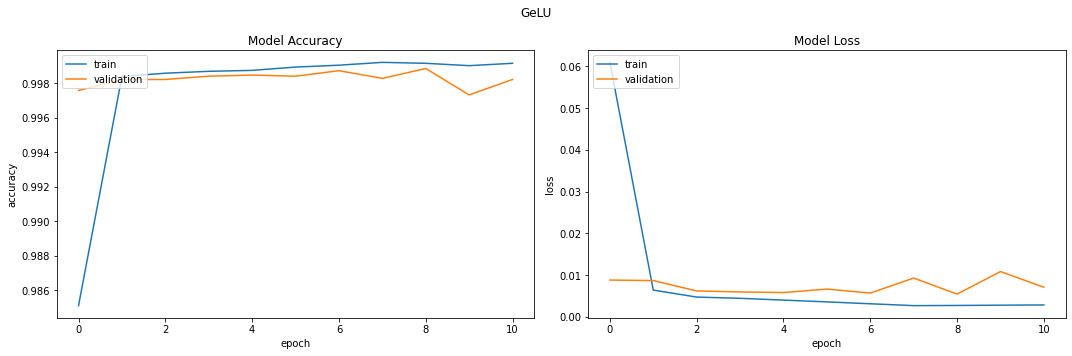

Tanh:
	Time to train: 76.6417s
	Time to test: 59.6070s


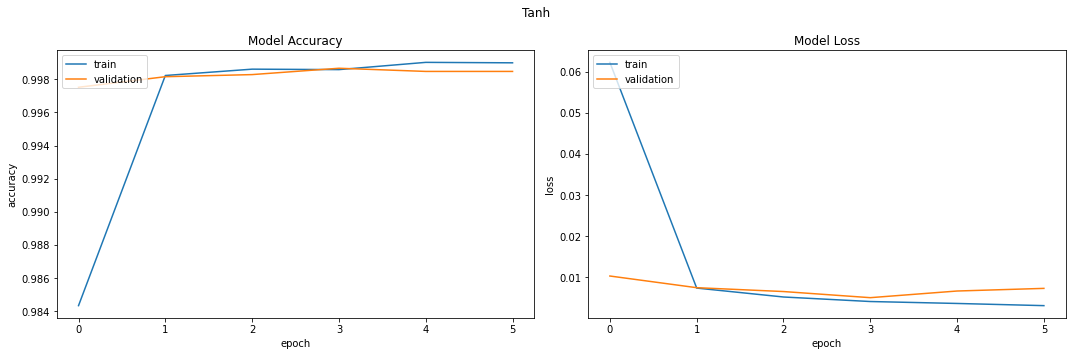

Sigmoid:
	Time to train: 76.7641s
	Time to test: 59.5336s


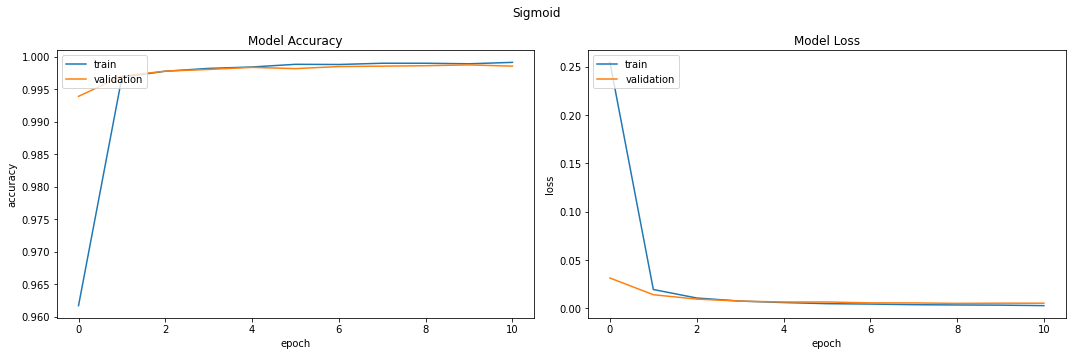

Softmax:
	Time to train: 86.1335s
	Time to test: 60.9786s


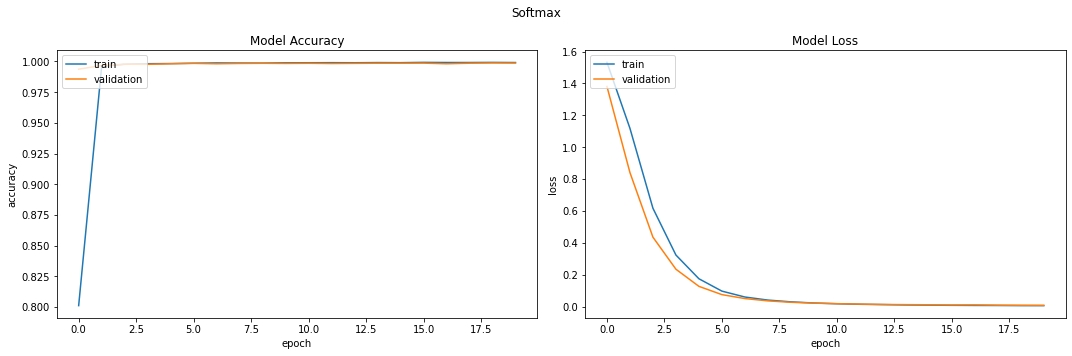

Softplus:
	Time to train: 72.6883s
	Time to test: 60.8870s


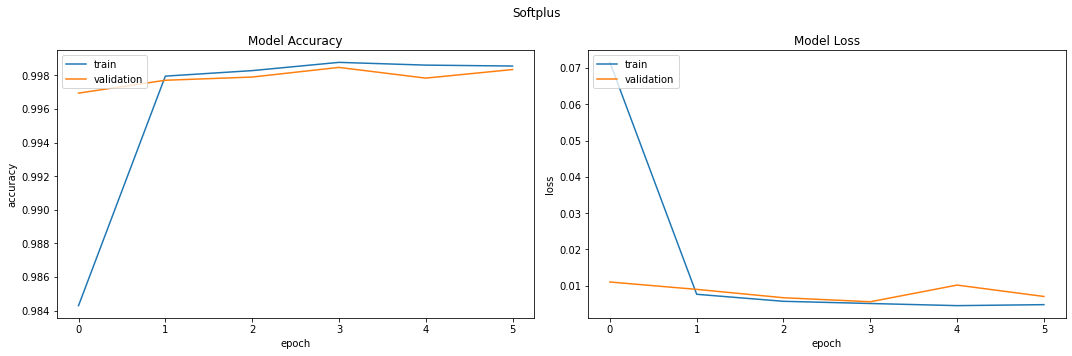

Softsign:
	Time to train: 82.3941s
	Time to test: 58.7520s


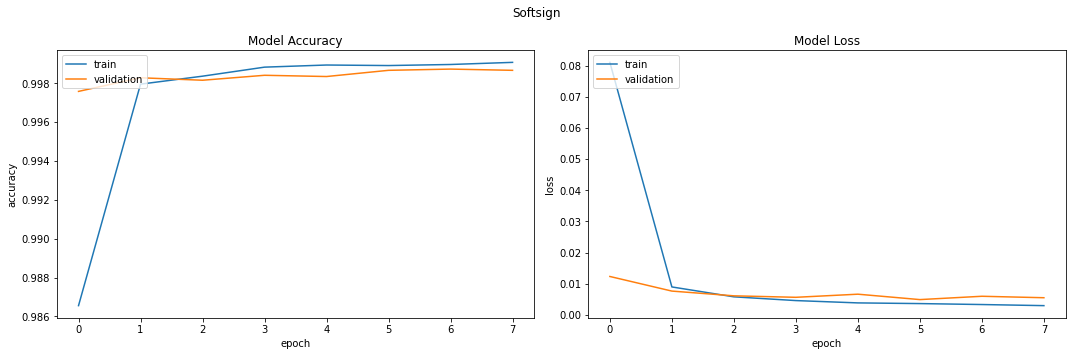

In [45]:
#Test out all of these activation functions
network_results = {}
history_results = {}

for label, fun in activation_functions:
    network = build_activation_network(fun)
    history = perform_param_test(network, dfs_touse['Power'], label, 100, 20, callbacks=callbacks)
    plot_results(history, label)

ReLU (Sigmoid):
	Time to train: 74.1163s
	Time to test: 58.2566s


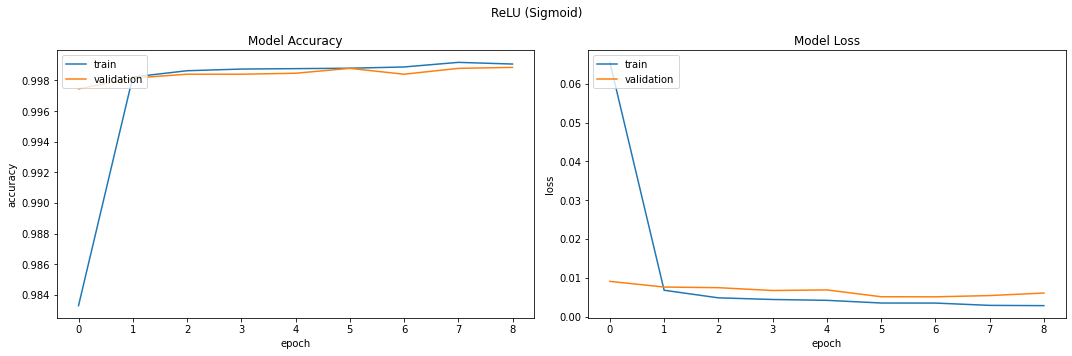

Leaky ReLU (Sigmoid):
	Time to train: 74.3547s
	Time to test: 58.1829s


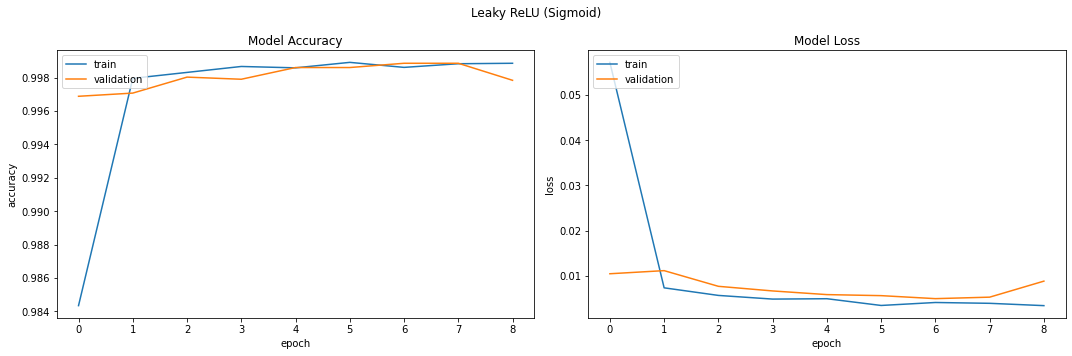

Parametric ReLU (Sigmoid):
	Time to train: 73.2088s
	Time to test: 58.8372s


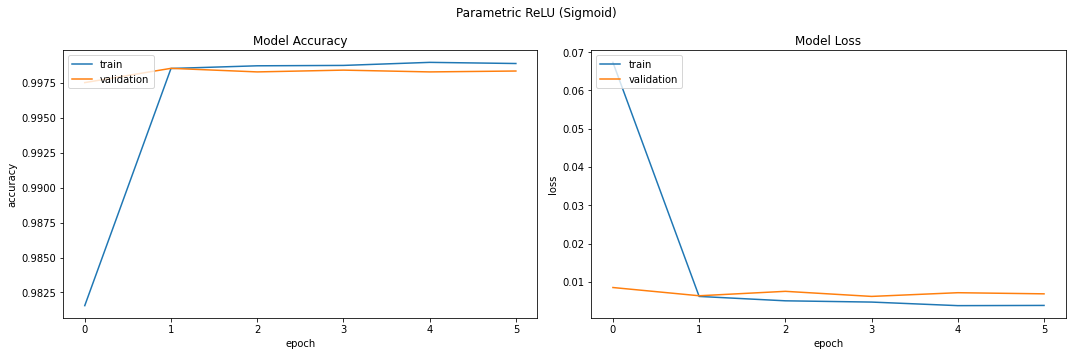

ELU (Sigmoid):
	Time to train: 70.6775s
	Time to test: 56.7693s


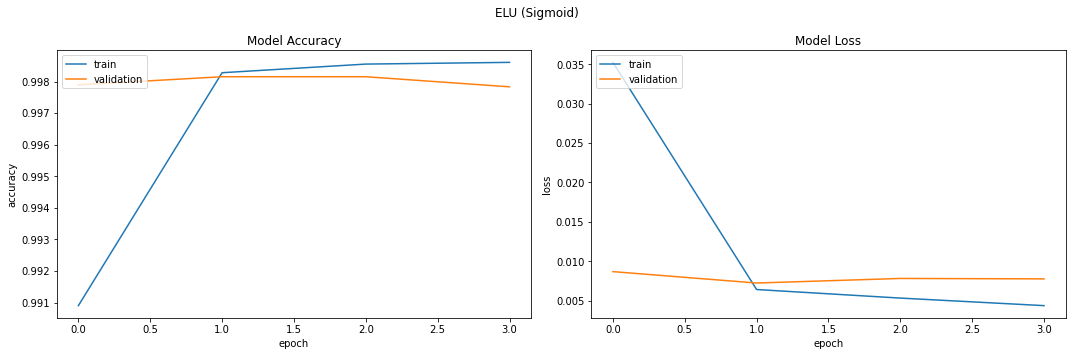

GeLU (Sigmoid):
	Time to train: 79.2544s
	Time to test: 62.6809s


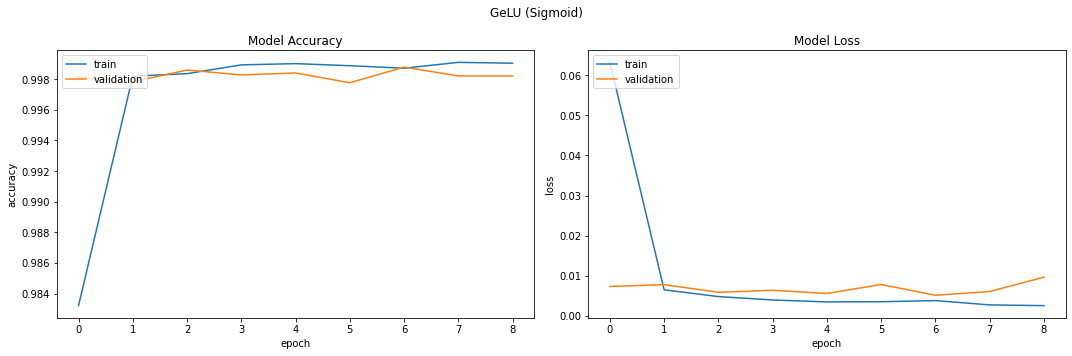

Tanh (Sigmoid):
	Time to train: 74.5387s
	Time to test: 59.8264s


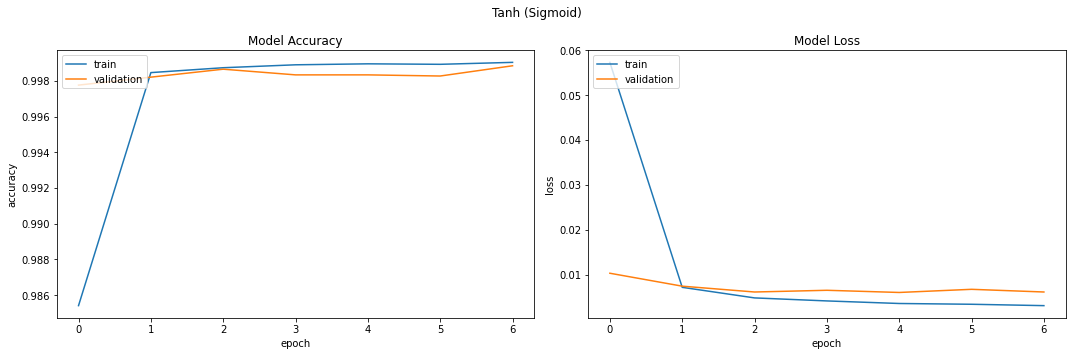

Sigmoid (Sigmoid):
	Time to train: 86.4481s
	Time to test: 63.2325s


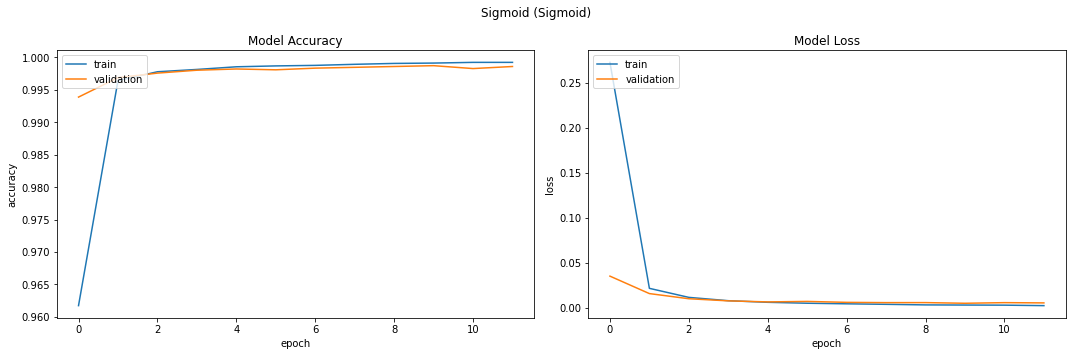

Softmax (Sigmoid):
	Time to train: 91.9457s
	Time to test: 72.9587s


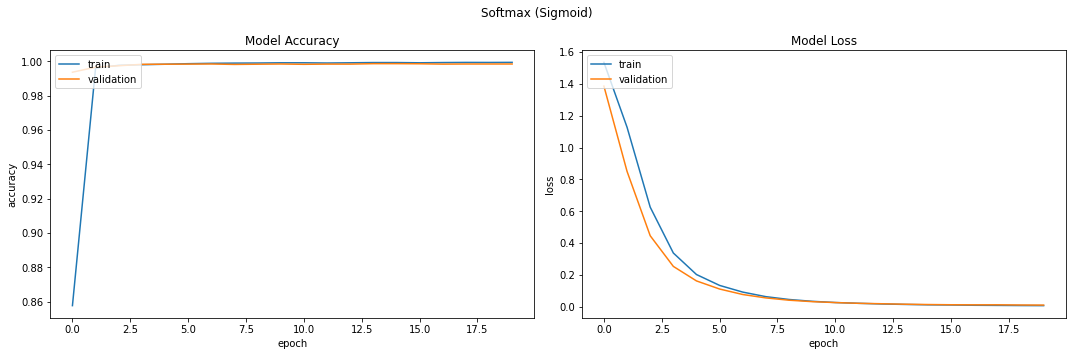

Softplus (Sigmoid):
	Time to train: 79.3640s
	Time to test: 61.6001s


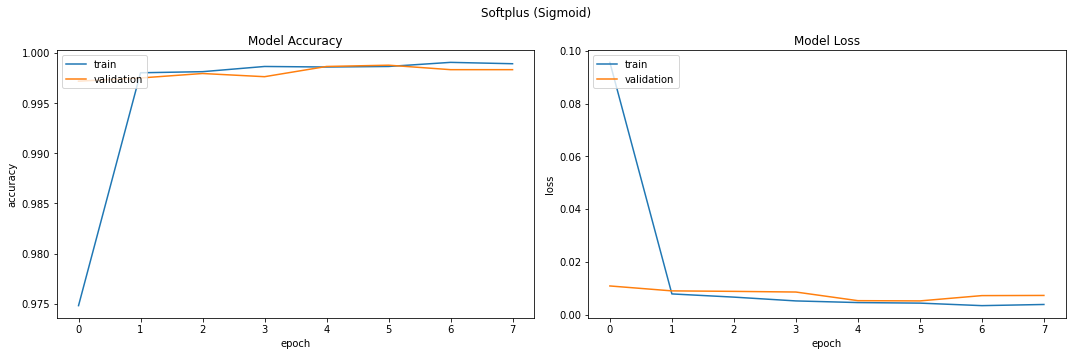

Softsign (Sigmoid):
	Time to train: 74.7784s
	Time to test: 58.8158s


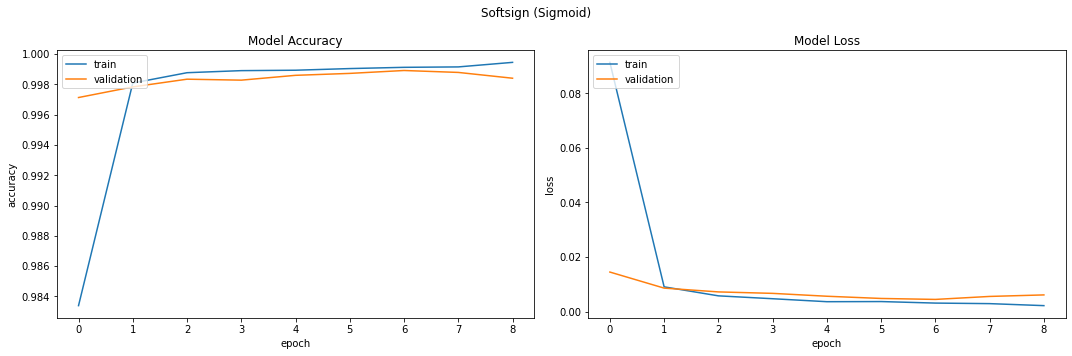

In [46]:
#Test out all of thse activation functions, but with a sigmoid output function

for label, fun in activation_functions:
    network = build_activation_network(fun, 'sigmoid')
    history = perform_param_test(network, dfs_touse['Power'], f"{label} (Sigmoid)", 100, 20, callbacks=callbacks)
    plot_results(history, f"{label} (Sigmoid)")

Next, we will test the SELU activation, but with the standardized dataset (which is needed for this function), and the needed kernel initialization.

SELU:
	Time to train: 62.6145s
	Time to test: 48.3598s


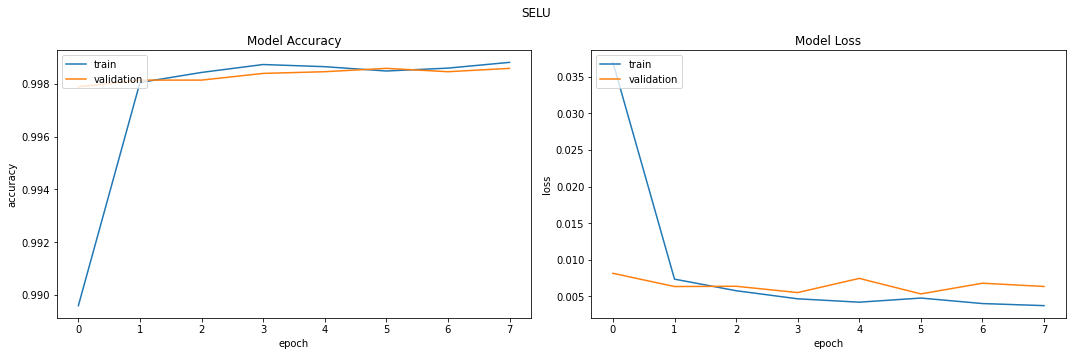

SELU (Sigmoid):
	Time to train: 64.1916s
	Time to test: 53.2006s


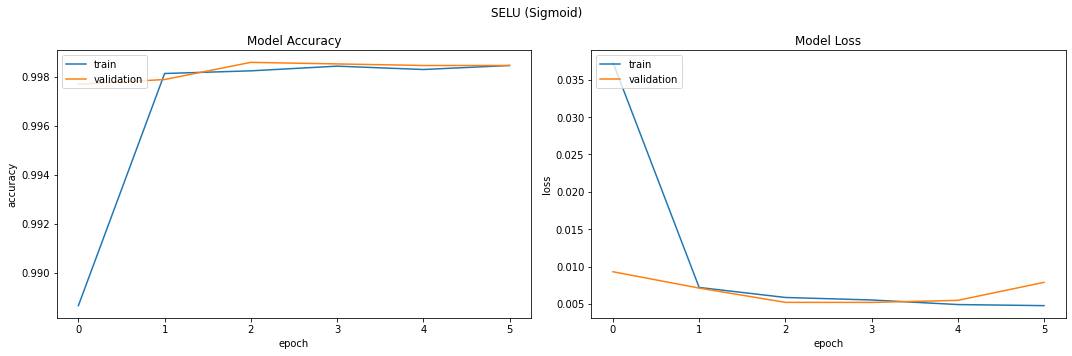

In [48]:
#Test out the SELU activation function with both output functions

def build_selu_network(output_activation):
    #Build neural network
    network = Sequential()
    network.add(Dense(80, input_dim=106, activation='selu', kernel_initializer='lecun_normal'))
    network.add(Dense(80, activation='selu', kernel_initializer='lecun_normal'))
    network.add(Dense(5, activation=output_activation))

    # Compile neural network
    network.compile(loss="categorical_crossentropy", # Cross-entropy
                    optimizer="adam", # Adam optization
                    metrics=["accuracy"]) # Accuracy performance metric
    
    return network

#Test with softmax
network = build_selu_network('softmax')
history = perform_param_test(network, dfs_touse['Standard'], "SELU", 100, 20, callbacks=callbacks)
plot_results(history, "SELU")

#Test with sigmoid
network = build_selu_network('sigmoid')
history = perform_param_test(network, dfs_touse['Standard'], "SELU (Sigmoid)", 100, 20, callbacks=callbacks)
plot_results(history, "SELU (Sigmoid)")

### Check out the results of all the activation functions

In [49]:
#Build results df
activation_df = pd.DataFrame.from_dict(network_results, orient='index')

#Get rid of all the columns except F1 scores
f1_activation_df = activation_df[['F1_Basmati','F1_Arborio','F1_Jasmine','F1_Ipsala','F1_Karacadag','F1_avg']]

Text(68.99999999999999, 0.5, 'Functions')

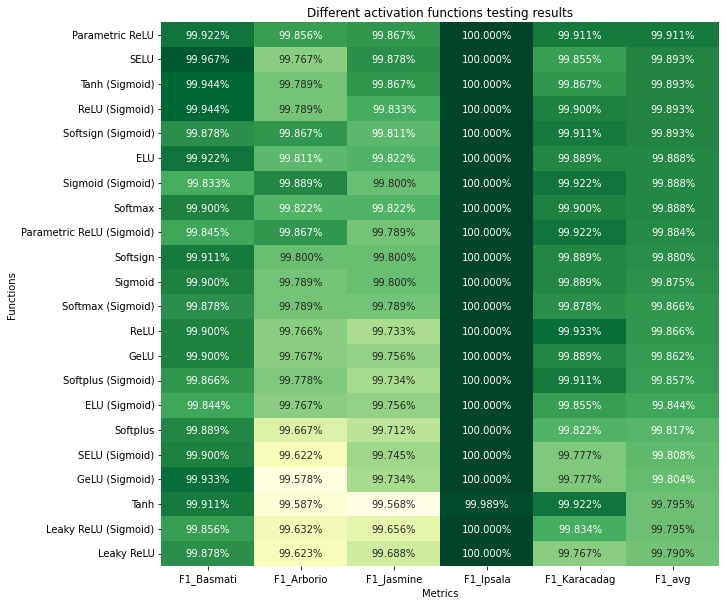

In [55]:
#Heatmap
sorted_f1_activation_df = f1_activation_df.sort_values('F1_avg', axis=0, ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(sorted_f1_activation_df, annot=sorted_f1_activation_df, cmap="YlGn", cbar=False, fmt=".3%")
plt.title("Different activation functions testing results")
plt.xlabel("Metrics")
plt.ylabel("Functions")

It seems that using the **parameteric ReLU** activation function for our hidden layers, and using the **softmax** activation function for our ouput layer, provided the best results.

**Note:** Due to the unstable nature of some of these examples, epoch by epoch, it could be interesting to pick the best epoch by looking at the loss charts and repeat the testing with those, cross-validated this time for best results.

## Try different optimizers

Adam optimizer has proven to work very well, as is often the case with it. But, just for curiosity's sake, let's try out stochastic gradient descent.

In [56]:
def build_optimizer_network(optimizer):
    #Build neural network
    network = Sequential()
    network.add(Dense(80, input_dim=106, activation=PReLU()))
    network.add(Dense(80, activation=PReLU()))
    network.add(Dense(5, activation='softmax'))

    # Compile neural network
    network.compile(loss="categorical_crossentropy", # Cross-entropy
                    optimizer=optimizer, # Adam optization
                    metrics=["accuracy"]) # Accuracy performance metric
    
    return network

Adam:
	Time to train: 70.5477s
	Time to test: 59.0582s


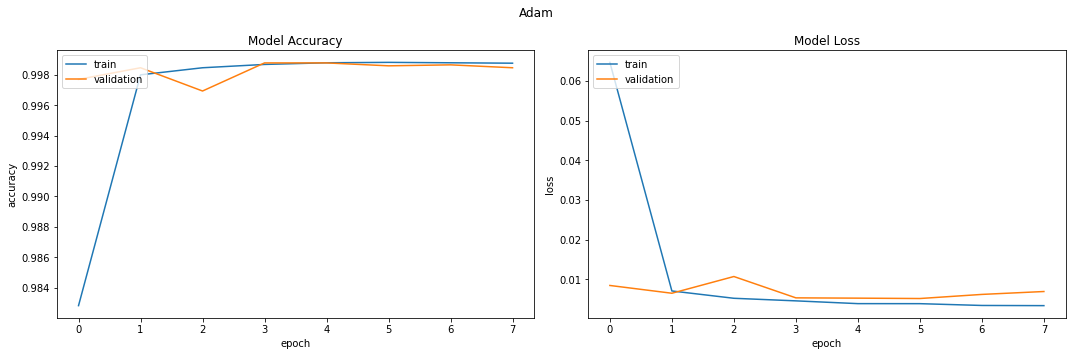

SGD:
	Time to train: 85.7139s
	Time to test: 60.4564s


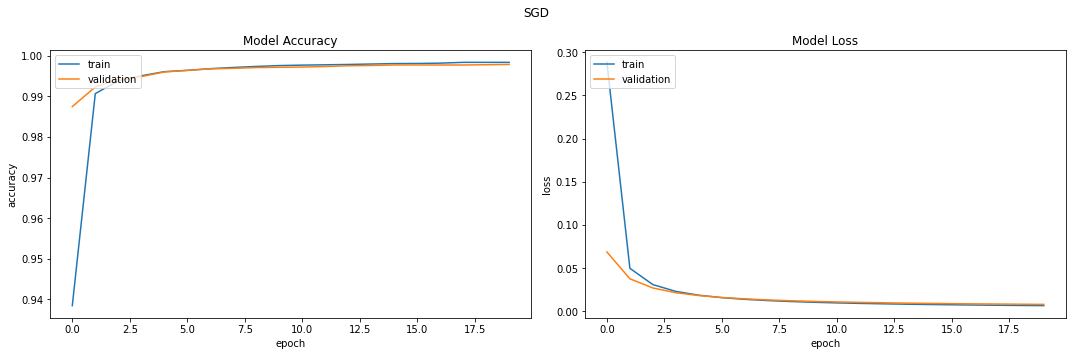

In [57]:
network_results = {}
history_results = {}

# Test adam optimizer
network = build_optimizer_network('adam')
history = perform_param_test(network, dfs_touse['Power'], "Adam", 100, 20, callbacks=callbacks)
plot_results(history, "Adam")

# Test SGD optimizer
network = build_optimizer_network('SGD')
history = perform_param_test(network, dfs_touse['Power'], "SGD", 100, 20, callbacks=callbacks)
plot_results(history, "SGD")

Three epochs seems like the optimal epoch count for Adam, so we will run it again.

Adam:
	Time to train: 70.3410s
	Time to test: 62.2708s


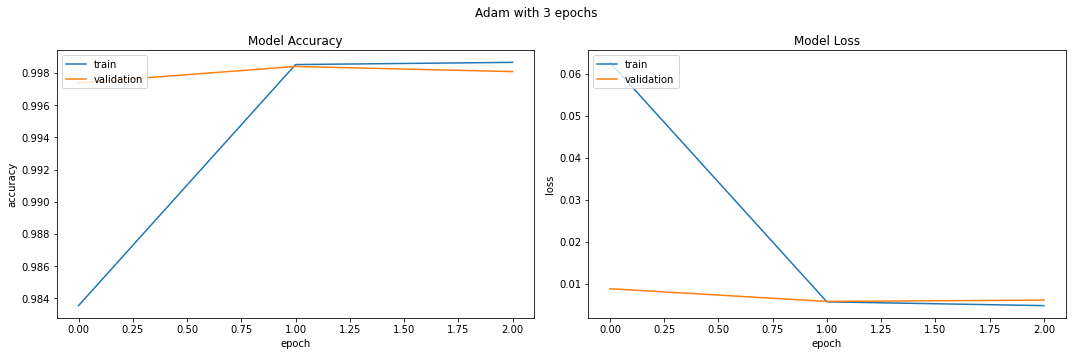

In [70]:
# Test adam optimizer with 3 epochs
network = build_optimizer_network('adam')
history = perform_param_test(network, dfs_touse['Power'], "Adam", 100, 3)
plot_results(history, "Adam with 3 epochs")

In [71]:
#Build results df
optimizer_df = pd.DataFrame.from_dict(network_results, orient='index')

Text(159.0, 0.5, 'Optimizers')

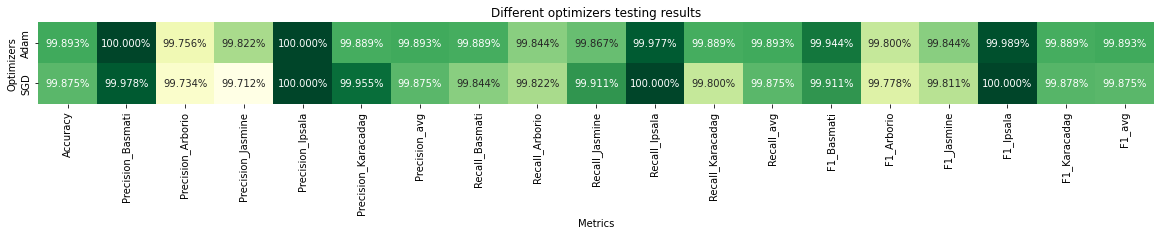

In [72]:
#Heatmap
plt.figure(figsize=(20,1.5))
sns.heatmap(optimizer_df, annot=optimizer_df, cmap="YlGn", cbar=False, fmt=".3%")
plt.title("Different optimizers testing results")
plt.xlabel("Metrics")
plt.ylabel("Optimizers")

The results are close, but it seems the **Adam** optimizer gives us the best results overall. To make sure, we will perform cross validation testing for both.

## Perform K-Fold Cross Validation for final testing results

In [73]:
def build_adam_network():
    return build_optimizer_network('adam')

def build_sgd_network():
    return build_optimizer_network('SGD')

In [75]:
final_results = {}

final_results['Adam'] = cv_test_network(build_adam_network, dfs_touse['Power'], reverse_target_column_dict, 'Adam', 100, 3)

Adam (fold number 0) - time to train: 88.6853s
Adam (fold number 1) - time to train: 90.1723s
Adam (fold number 2) - time to train: 95.0040s
Adam (fold number 3) - time to train: 97.6513s
Adam (fold number 4) - time to train: 92.7093s
Adam (fold number 5) - time to train: 90.2862s
Adam (fold number 6) - time to train: 93.8598s
Adam (fold number 7) - time to train: 88.9427s
Adam (fold number 8) - time to train: 94.6652s
Adam (fold number 9) - time to train: 92.4010s


In [76]:
final_results['SGD'] = cv_test_network(build_sgd_network, dfs_touse['Power'], reverse_target_column_dict, 'SGD', 100, 16)

SGD (fold number 0) - time to train: 105.1300s
SGD (fold number 1) - time to train: 113.3481s
SGD (fold number 2) - time to train: 114.9013s
SGD (fold number 3) - time to train: 114.2779s
SGD (fold number 4) - time to train: 115.7527s
SGD (fold number 5) - time to train: 115.5295s
SGD (fold number 6) - time to train: 119.6971s
SGD (fold number 7) - time to train: 122.7420s
SGD (fold number 8) - time to train: 121.0150s
SGD (fold number 9) - time to train: 110.9245s


In [77]:
#Build results df
final_testing_df = pd.DataFrame.from_dict(final_results, orient='index')

Text(159.0, 0.5, 'Optimizers')

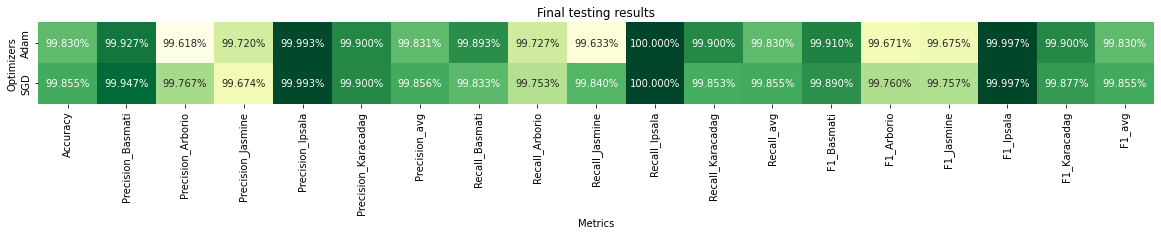

In [78]:
#Heatmap
plt.figure(figsize=(20,1.5))
sns.heatmap(final_testing_df, annot=final_testing_df, cmap="YlGn", cbar=False, fmt=".3%")
plt.title("Final testing results")
plt.xlabel("Metrics")
plt.ylabel("Optimizers")